In [45]:
import numpy as np 
import matplotlib.pyplot as plt 
from qutip import *

In [46]:
dimension = 3
a_ = create(dimension)
a = destroy(dimension)

alpha = -2*np.pi*0.23
omega = 2*np.pi*5.5

def calamp(args,area = np.pi):
    pilen = args['pilen']
    pifwhm = args['pifwhm']
    x = np.linspace(0,pilen,pilen*4+1)
    piamp = area/np.trapz(np.exp(-(x-pilen/2)**2/(pifwhm/4/np.log(2))),x)
    return piamp

def f(t,args):
    piamp = args['piamp']
    pilen = args['pilen']
    pifwhm = args['pifwhm']
    return piamp*np.exp(-(t-pilen/2)**2/(pifwhm/4/np.log(2)))
def k(t,args):
    c = args['c']
    alpha = args['alpha']
    pienv = args['pienv']
    return c*pienv(t,args)-alpha

H0 = alpha/2 * a_*a_*a*a 
H = [H0,[(a_ + a)/2, f ]]
H_zm = [H0,[(a_ + a)/2, f ],[a_*a, k]]


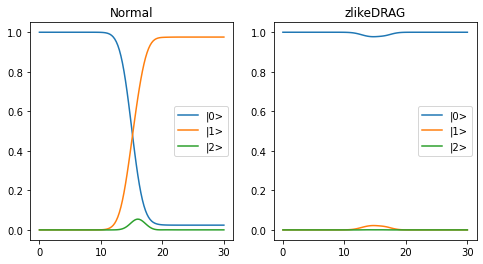

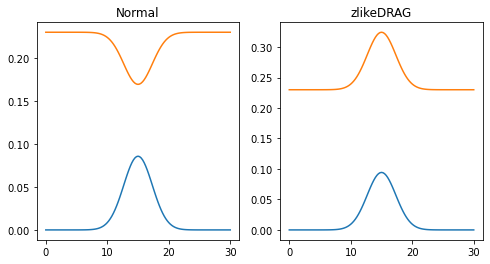

In [47]:
waveinfo = {
    'pilen': 30,
    'pifwhm': 30,
    'c' : -np.sqrt(2)/2 ,
    'alpha':alpha,
    'pienv':f
}
waveinfo.update({'piamp':calamp(waveinfo)})

waveinfo_zm = {
    'pilen': 30,
    'pifwhm': 30,
    'c' : 1 ,
    'alpha':alpha,
    'pienv':f
}
waveinfo_zm.update({'piamp':calamp(waveinfo_zm,area = 1.1*np.pi)})



phi0 = basis(3,0)
t = np.linspace(0,waveinfo['pilen'],waveinfo['pilen']*4+1)
res = mesolve(H, phi0, t, args = waveinfo,e_ops = [basis(3,0)*basis(3,0).dag(),basis(3,1)*basis(3,1).dag(),basis(3,2)*basis(3,2).dag()])
res_zm = mesolve(H_zm, phi0, t, args = waveinfo_zm,e_ops = [basis(3,0)*basis(3,0).dag(),basis(3,1)*basis(3,1).dag(),basis(3,2)*basis(3,2).dag()])

fig,ax = plt.subplots(1,2,figsize = (8,4))
ax[0].plot(t,res.expect[0],label = '|0>')
ax[0].plot(t,res.expect[1],label = '|1>')
ax[0].plot(t,res.expect[2],label = '|2>')
ax[0].set_title('Normal')
ax[1].plot(t,res_zm.expect[0],label = '|0>')
ax[1].plot(t,res_zm.expect[1],label = '|1>')
ax[1].plot(t,res_zm.expect[2],label = '|2>')
ax[1].set_title('zlikeDRAG')
ax[0].legend()
ax[1].legend()
plt.show()


# fig,ax = plt.subplots(1,2,figsize = (8,4))
# ax[0].plot(t,(f(t,args = waveinfo)*f(t,args = waveinfo)/2*(1/k(t,args = waveinfo)-1/(k(t,args = waveinfo)+alpha))+k(t,args = waveinfo))/2/np.pi)
# ax[0].plot(t,k(t,args = waveinfo)/2/np.pi)
# ax[0].set_title('Normal')
# ax[1].plot(t,f(t,args = waveinfo_zm)/2/np.pi)
# ax[1].plot(t,k(t,args = waveinfo_zm)/2/np.pi)
# ax[1].set_title('zlikeDRAG')
# plt.show()


fig,ax = plt.subplots(1,2,figsize = (8,4))
ax[0].plot(t,f(t,args = waveinfo)/2/np.pi)
ax[0].plot(t,k(t,args = waveinfo)/2/np.pi)
ax[0].set_title('Normal')
ax[1].plot(t,f(t,args = waveinfo_zm)/2/np.pi)
ax[1].plot(t,k(t,args = waveinfo_zm)/2/np.pi)
ax[1].set_title('zlikeDRAG')
plt.show()



In [7]:
calamp(waveinfo)

0.5388365356103328

In [42]:
def test(*args):
    a,b = args 
    print('a+b',a+b)